In [171]:
#libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [172]:
#loading data
data = pd.read_csv("train.csv")

In [173]:
# Dividing the data into train test
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

In [174]:
#List of continous variables having missing values
continous_var_na=[]

for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content) and X_train[label].isnull().sum()>0:
        continous_var_na.append(label)

In [175]:
#List of categorical variables having missing values
cat_var_na=[]

for label, content in X_train.items():
    if pd.api.types.is_signed_integer_dtype(content) and X_train[label].isnull().sum()>0:
        cat_var_na.append(label)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4a725250>,
      dtype=object)

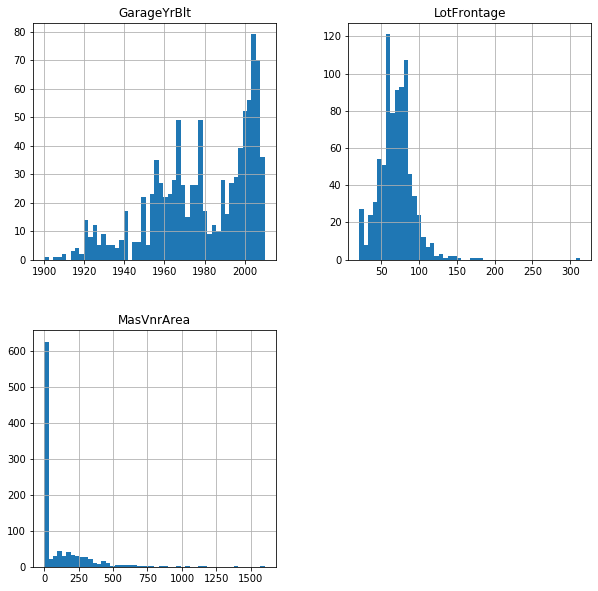

In [176]:
#plotting continious variables
X_train[continous_var_na].hist(bins=50, figsize=(10,10))


In [177]:
def random_sample_imputer(data, var):
    
    """
    this function takes a random sample to replace the data
    and return a series that doesnt have any missing values
    it can be used both for numerical and categorical variable
    """
    
    #creating copy of the variable
    data[var+'_imputed'] = data[var].copy()
    
    #taking a random sample but first Na values
    rs_data = data[var].dropna().sample(data[var].isnull().sum(), random_state=101)
    
    #need to merge the na values with random values bvut index need to be sampe
    rs_data.index = data[data[var].isnull()].index
    
    #replacing with random sample
    data.loc[data[var].isnull(), var+'_imputed'] = rs_data
    
    #return data[var+'_imputed']
    

In [178]:
def cat_plot_change(df, v1,v2, target):
    """
    this fucntion plots categorical variables before and after imputation of desnisty plot 
    """
    
    fig = plt.figure(figsize=(15,5))
    
    #before imputation
    ax = fig.add_subplot(121)
    
    plt.title("before imputation")
    plt.xlabel(target)
    for category in df[v1].dropna().unique():
        df[df[v1]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[v1].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    #after Imputation
    ax = fig.add_subplot(122)
    
    plt.title("after imputation")
    plt.xlabel(target)

    for category in df[v2].unique():
        df[df[v2]==category][target].plot(kind='kde', ax=ax)
     
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[v2].unique()
    ax.legend(lines, labels, loc='best')
   
    
    plt.show()

In [179]:
def plot_dist_change(data, var1, var2,figsize):
    
    """
    This Function plots 3 graph
    1st- distribution before dropping missing values
    2nd- dsitribution after dropping missing values
    3rd - distribution comparison 
    """
    
    #setting the figure size for our distrbution 
    fig = plt.figure(figsize=figsize)
    
    
    ax = fig.add_subplot(131) #defining where we ant our plot 
    data[var1].hist(bins=50, ax=ax, color='orange',alpha=1,label="Before_imputation")#plotting distribution
    plt.title(var1)
    plt.legend() # getting the legends 
    
    ax = fig.add_subplot(132)
    data[var2].hist(bins=50, ax=ax, color='green',  alpha=0.8,label="After_imputation")
    plt.title(var2)
    plt.legend()

    
    ax = fig.add_subplot(133)
    data[var1].hist(bins=50, ax=ax, color='orange',alpha=1,label="Befor_imputation")
    data[var2].hist(bins=50, ax=ax, color='green',  alpha=.5,label="After_imputation")
    plt.title("Distribution change")
    plt.legend()

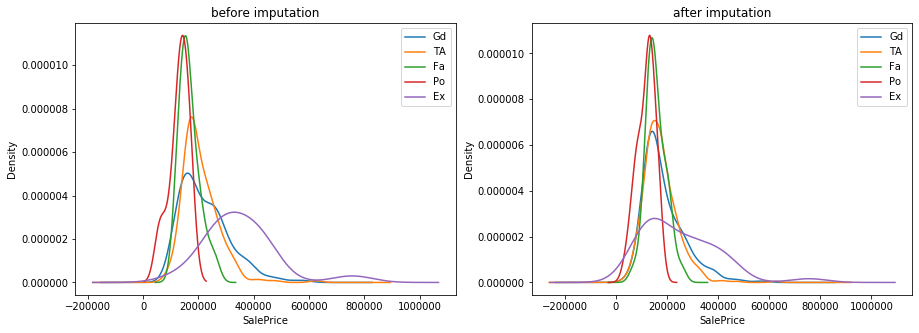

In [182]:
#checking for categorical variable
random_sample_imputer(X_train, "FireplaceQu")

cat_plot_change(X_train, "FireplaceQu","FireplaceQu_imputed", "SalePrice")

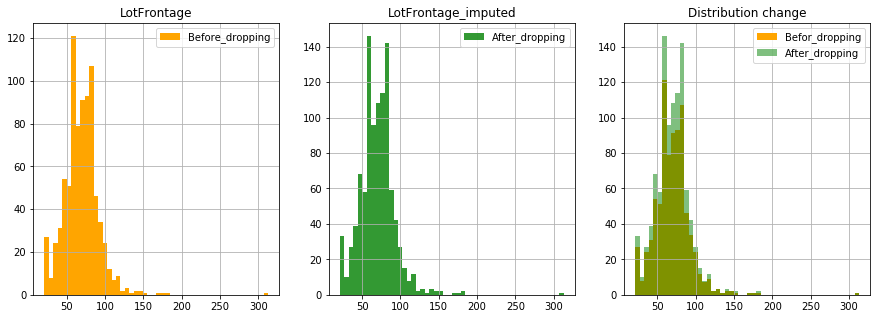

In [181]:
#checking for numerical variable
random_sample_imputer(X_train, "LotFrontage")

plot_dist_change(X_train, "LotFrontage", "LotFrontage_imputed",(15,5))